## K Means Clustering Model Implementation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from sklearn.datasets import make_blobs

In [28]:
X, Y = make_blobs(n_samples = 1000, n_features = 2, centers = 3)

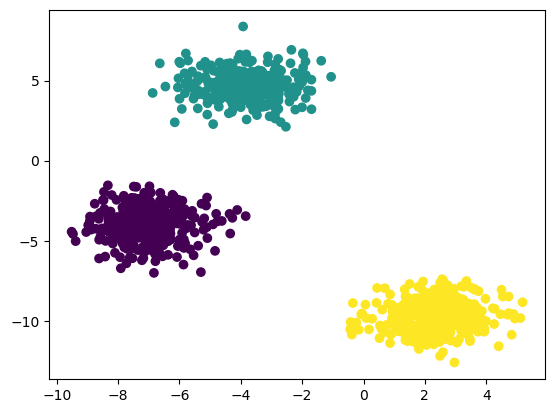

In [30]:
plt.scatter(X[:,0], X[:,1], c = Y)
plt.show()

In [39]:
# Splitting into Training and Testing data
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

### Standardization -> Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [43]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Training

In [48]:
from sklearn.cluster import KMeans

In [50]:
# Elbow method to select the K value
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = "k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [52]:
wcss

[1400.0,
 390.5134265247913,
 62.85978505780491,
 53.84919538070365,
 44.476551676473704,
 35.470356067797745,
 32.109261261834945,
 28.839976239913533,
 28.7203905562225,
 23.757629666333305]

As the K value increases, the WCSS value decreases.

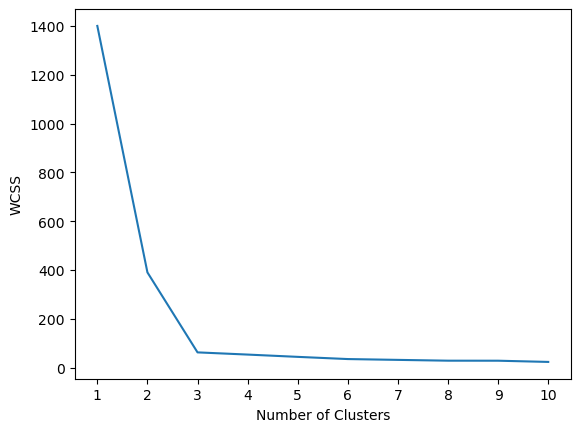

In [61]:
# Plotting the elbow curve
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

3 is the value we should choose.

In [64]:
kmeans = KMeans(n_clusters = 3, init = "k-means++")

In [66]:
kmeans.fit_predict(X_train_scaled)

array([2, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 2, 1, 0, 2, 2, 2, 2, 2, 1, 0, 0,
       0, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 2, 2,
       2, 1, 2, 2, 2, 1, 0, 1, 1, 0, 1, 0, 2, 1, 2, 0, 1, 2, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 2, 0, 1, 2, 2, 2, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 2, 1,
       0, 1, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 0, 1, 1,
       0, 2, 0, 1, 1, 2, 1, 2, 2, 2, 2, 0, 0, 0, 1, 0, 0, 2, 0, 1, 1, 0,
       2, 1, 2, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 1, 2, 0, 1, 2,
       0, 0, 0, 1, 2, 1, 2, 0, 1, 2, 1, 0, 2, 2, 2, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 2, 2, 1, 0, 0, 1, 1, 0, 1, 1, 2, 2, 0, 2, 1, 0, 1, 1, 2, 1,
       2, 0, 0, 0, 2, 2, 1, 0, 0, 2, 2, 1, 2, 2, 2, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 2, 1, 1, 0, 2, 0, 0, 0, 1, 1, 2, 2, 2, 0, 0, 2, 1, 0,
       1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0, 2, 2, 2, 2, 2, 0, 1,
       2, 1, 1, 1, 0, 2, 1, 1, 0, 2, 2, 2, 1, 2, 0,

In [68]:
Y_pred = kmeans.predict(X_test_scaled)

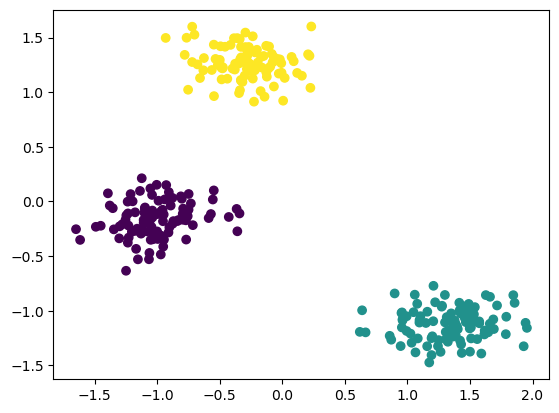

In [70]:
# Lets check the results 
plt.scatter(X_test_scaled[:,0], X_test_scaled[:,1], c = Y_pred)
plt.show()